In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('pizza_v2.csv')

# 1. Display Top 5 Rows of The Dataset

In [3]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


# 2. Check Last 5 Rows of The Dataset

In [4]:
df.tail()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes
128,E,"Rp78,000",12 inch,meat,BBQ_meat_fiesta,medium,no,no,yes


# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [5]:
df.shape

(129, 9)

In [6]:
print('NUMBER OF ROWS :-', df.shape[0])
print('NUMBER OF ROWS :-', df.shape[1])

NUMBER OF ROWS :- 129
NUMBER OF ROWS :- 9


# 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


# 5.Check Null Values In The Dataset

In [8]:
df.isnull().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

# 5.Check Null Values In The Dataset

In [9]:
df.describe().T

,count,unique,top,freq
company,129,5,C,30
price_rupiah,129,43,"Rp72,000",11
diameter,129,12,12 inch,49
topping,129,12,chicken,29
variant,129,20,classic,30
size,129,6,medium,41
extra_sauce,129,2,yes,76
extra_cheese,129,2,yes,86
extra_mushrooms,129,2,yes,72


# 7. Data Preprocessing

In [10]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [11]:
df.rename({'price_rupiah':'Price'}, axis =1, inplace = True)

In [12]:
df[:2]

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no


In [13]:
df['Price'] = df['Price'].str.replace('Rp','')
df['Price']= df['Price'].str.replace(',','').astype('int32')

In [14]:
df[:2]

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20 inch,papperoni,double_signature,jumbo,yes,yes,no


In [15]:
df['diameter'] = df['diameter'].str.replace('inch','')
df['diameter'] = df['diameter'].str.replace('','').astype('float32')

In [16]:
df[:2]

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes,no


In [17]:
def convert(value):
    return value*0.0054

In [18]:
df['Price']=df['Price'].apply(convert)

# Data Analysis
8. What is Univariate Analysis?

In [19]:
df.columns

Index(['company', 'Price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [20]:
df['company'].value_counts()

C    30
E    30
A    25
B    24
D    20
Name: company, dtype: int64

In [21]:
df['Price'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1269.0
1      1069.2
2       648.0
3       837.0
4      1339.2
        ...  
124     210.6
125     388.8
126     534.6
127     237.6
128     421.2
Name: Price, Length: 129, dtype: float64>

Text(0.5, 1.0, 'PRICE DISTRIBUTION')

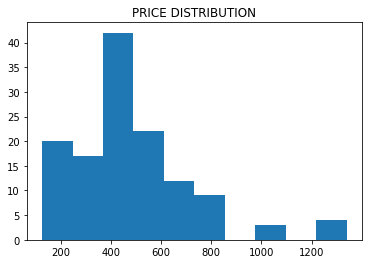

In [22]:
plt.hist(x = 'Price', data =df)
plt.title('PRICE DISTRIBUTION')

In [23]:
df['diameter'].value_counts()

12.0    49
14.0    24
8.5     22
17.0    10
18.5     6
16.0     5
8.0      4
16.5     4
22.0     3
20.0     1
18.0     1
Name: diameter, dtype: int64

C:\Users\PRANJAL SAXENA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diameter', ylabel='count'>

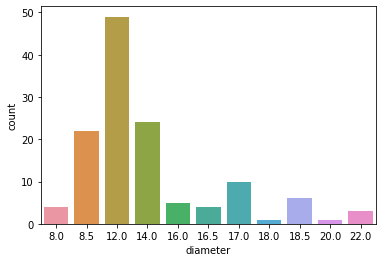

In [24]:
sns.countplot(df['diameter'])

In [25]:
df['topping'].value_counts()

chicken         29
mushrooms       22
mozzarella      21
smoked_beef     19
tuna             9
vegetables       9
meat             8
black_papper     3
sausage          3
beef             3
papperoni        2
onion            1
Name: topping, dtype: int64

<AxesSubplot:xlabel='count', ylabel='topping'>

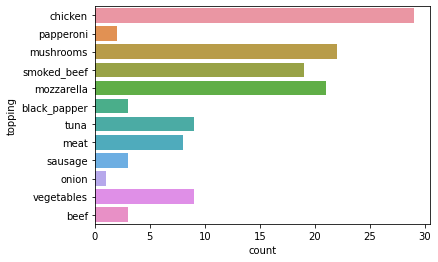

In [26]:
sns.countplot(y = df['topping'])

In [27]:
df['variant'].value_counts()

classic              30
meat_lovers          10
double_mix           10
crunchy              10
new_york             10
double_decker         9
double_signature      5
american_favorite     5
BBQ_meat_fiesta       5
super_supreme         5
spicy_tuna            3
BBQ_sausage           3
extravaganza          3
meat_eater            3
gournet_greek         3
italian_veggie        3
thai_veggie           3
american_classic      3
neptune_tuna          3
spicy tuna            3
Name: variant, dtype: int64

<AxesSubplot:xlabel='count', ylabel='variant'>

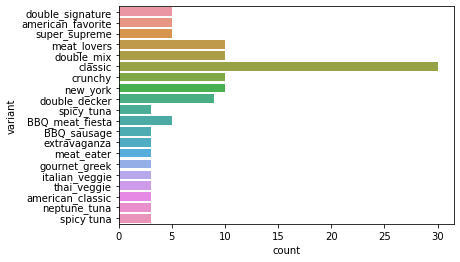

In [28]:
sns.countplot(y = df['variant'])

In [29]:
df['size'].value_counts()

medium     41
small      22
large      21
reguler    20
jumbo      15
XL         10
Name: size, dtype: int64

C:\Users\PRANJAL SAXENA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size', ylabel='count'>

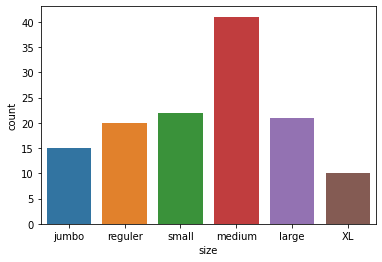

In [30]:
sns.countplot(df['size'])

In [31]:
df['extra_sauce'].value_counts()

yes    76
no     53
Name: extra_sauce, dtype: int64

C:\Users\PRANJAL SAXENA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='extra_sauce', ylabel='count'>

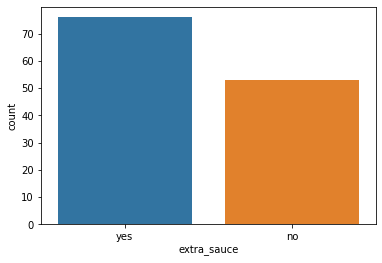

In [32]:
sns.countplot(df['extra_sauce'])

In [33]:
df['extra_cheese'].value_counts()

yes    86
no     43
Name: extra_cheese, dtype: int64

C:\Users\PRANJAL SAXENA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='extra_cheese', ylabel='count'>

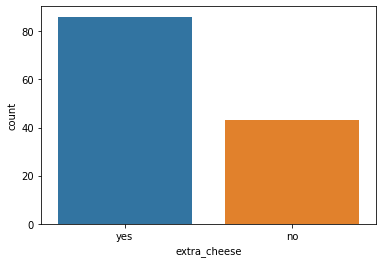

In [34]:
sns.countplot(df['extra_cheese'])

In [35]:
df['extra_mushrooms'].value_counts()

yes    72
no     57
Name: extra_mushrooms, dtype: int64

C:\Users\PRANJAL SAXENA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='extra_mushrooms', ylabel='count'>

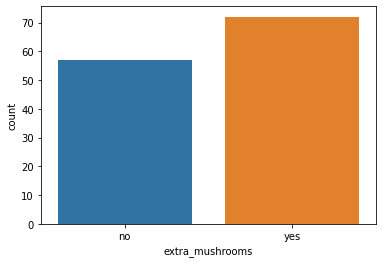

In [36]:
sns.countplot(df['extra_mushrooms'])

# Find the most expensive pizza

In [37]:
df.columns

Index(['company', 'Price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [38]:
df[df['Price'].max() == df['Price']]

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


# Find diameters of jumbo size pizza

In [39]:
df.columns

Index(['company', 'Price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [40]:
df['size'].value_counts()

medium     41
small      22
large      21
reguler    20
jumbo      15
XL         10
Name: size, dtype: int64

In [41]:
df[df['size']=='jumbo']['diameter'].sort_values(ascending = False).head()

0     22.0
20    22.0
84    22.0
1     20.0
5     18.5
Name: diameter, dtype: float32

# Find diameters of XL size pizza

In [42]:
df.columns

Index(['company', 'Price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [43]:
df[df['size'] =='XL']['diameter'].sort_values(ascending = False)

29     17.0
35     17.0
41     17.0
47     17.0
93     17.0
99     17.0
104    17.0
110    17.0
116    17.0
122    17.0
Name: diameter, dtype: float32

# Let's remove outliers

In [44]:
df[(df['size']=='jumbo') & (df['diameter']<=16)]


,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
6,A,594.0,16.0,smoked_beef,american_favorite,jumbo,no,yes,yes
11,A,594.0,16.0,black_papper,super_supreme,jumbo,yes,yes,no
16,A,594.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,yes
80,D,594.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,no


In [45]:
df = df.drop(df.index[[6,11,16,80]])

# 9. Label Encoding

In [46]:
cat_cols = df.select_dtypes(include=['object']).columns

In [47]:
cat_cols

Index(['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese',
       'extra_mushrooms'],
      dtype='object')

In [48]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

for i in cat_cols:
    df[i] = lb.fit_transform(df[i])

In [49]:
df[:5]

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,1269.0,22.0,2,8,1,1,1,0
1,0,1069.2,20.0,7,8,1,1,1,0
2,0,648.0,16.0,5,8,4,1,1,1
3,0,837.0,14.0,9,8,4,1,0,1
4,0,1339.2,18.0,4,8,1,1,0,1


# 10. Store Feature Matrix In X and Response(Target) In Vector y

In [50]:
df.columns

Index(['company', 'Price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [51]:
X = df.drop(columns='Price')
y = df['Price']

# 11. Splitting The Dataset Into The Training Set And Test Set

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)
X_train.shape[0],X_test.shape[0],y_train.shape[0],y_test.shape[0]

(100, 25, 100, 25)

# 12. Import The models

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [54]:
lr = LinearRegression()
lr.fit(X_train,y_train)
sv = SVR()
sv.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

# 14. Prediction on Test Data

In [55]:
y_pred1 = lr.predict(X_test)
y_pred2 = sv.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gb.predict(X_test)
y_pred5 = xg.predict(X_test)

# 15. Evaluating the Algorithm

In [56]:
from sklearn import metrics

In [57]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)
score5 = metrics.r2_score(y_test,y_pred5)

print(score1,score2,score3,score4,score5)

0.6712827779795156 -0.058422678416528706 0.8324234574591707 0.8870534846371194 0.9037532335665138


In [58]:
final_data = pd.DataFrame({'MODEL':['lr','sv','rf','gb','xg',], 'r2_score':[score1,score2,score3,score4,score5] })

In [59]:
final_data

,MODEL,r2_score
0,lr,0.671283
1,sv,-0.058423
2,rf,0.832423
3,gb,0.887053
4,xg,0.903753


C:\Users\PRANJAL SAXENA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MODEL', ylabel='r2_score'>

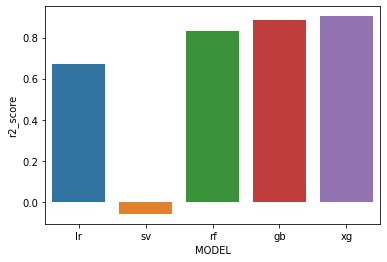

In [60]:
sns.barplot(final_data['MODEL'],final_data['r2_score'])

# 16. Save The Model


In [61]:
df.columns

Index(['company', 'Price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [62]:
X = df.drop(columns='Price')
y = df['Price']

In [65]:
xg1 = XGBRegressor()
xg1.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [64]:
import joblib

In [66]:
joblib.dump(xg1,'PIZZA PRICE PREDICTOR')

['PIZZA PRICE PREDICTOR']

In [67]:
model = joblib.load('PIZZA PRICE PREDICTOR')

In [73]:
df1 = pd.DataFrame({
    'company':1,
    'diameter':22.0,
    'topping':2,
    'variant':8,
    'size':1,
    'extra_sauce':1,
    'extra_cheese':1,
    'extra_mushrooms':1
},index =[0])

In [74]:
df1

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,1,22.0,2,8,1,1,1,1


In [75]:
model.predict(df1)

array([1214.995], dtype=float32)

# GUI

In [77]:
from tkinter import *

In [78]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())

    model = joblib.load('PIZZA PRICE PREDICTOR')
    df = pd.DataFrame({
    'company':p1,
    'diameter':p2,
    'topping':p3,
    'variant':p4,
    'size':p5,
    'extra_sauce':p6,
    'extra_cheese':p7,
    'extra_mushrooms':p8
},index=[0])
    result = model.predict(df)
    
    Label(master, text="Pizza Price is").grid(row=31)
    Label(master, text=result).grid(row=32)
    print("Pizza Price Prediction", result)
    
master =Tk()
master.title("Pizza Price Prediction Using Machine Learning")
label = Label(master,text = "Pizza Price Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Company Name").grid(row=1)
Label(master,text = "Enter Your Diameter of the Pizza").grid(row=2)
Label(master,text = "Topping").grid(row=3)
Label(master,text = "Variant").grid(row=4)
Label(master,text = "Size").grid(row=5)
Label(master,text = "extra_sauce [1:yes,0:No]").grid(row=6)
Label(master,text = "extra_cheese [1:yes,0:No] ").grid(row=7)
Label(master,text = "extra_mushrooms [1:yes,0:No]").grid(row=8)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)

Button(master,text="Predict",command=show_entry).grid()

mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\PRANJAL SAXENA\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\PRANJAL SAXENA\AppData\Local\Temp\ipykernel_11588\853346238.py", line 3, in show_entry
    p1 = float(e1.get())
ValueError: could not convert string to float: ''
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\PRANJAL SAXENA\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\PRANJAL SAXENA\AppData\Local\Temp\ipykernel_11588\853346238.py", line 3, in show_entry
    p1 = float(e1.get())
ValueError: could not convert string to float: ''
